In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

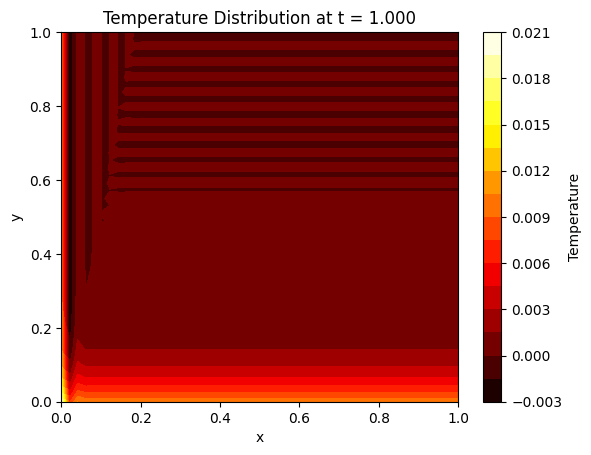

In [6]:

# Parameters
alpha = 0.01    # Thermal diffusivity
Lx, Ly = 1.0, 1.0  # Dimensions of the 2D domain
nx, ny = 50, 50    # Number of spatial grid points
dx, dy = Lx / (nx - 1), Ly / (ny - 1)  # Spatial step sizes
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

# Create a meshgrid for 2D domain
X, Y = np.meshgrid(x, y)

# Initial condition: Gaussian distribution at the center
u_initial = np.zeros((len(X), len(Y))).flatten()

# Function to compute the right-hand side of the ODE system
def heat_equation_2d(t, u):
    u = u.reshape((nx, ny))  # Reshape to 2D
    dudx2 = np.zeros_like(u)
    dudy = np.zeros_like(u)
    dudy[:, 0] = 1
    dudx2[0,:] = 1

    # Compute second derivatives using finite differences
    dudx2[1:-1, :] = (u[2:, :] - 2 * u[1:-1, :] + u[:-2, :]) / dx**2
    dudy[:, 1:] = (u[:, 1:] - u[:, :-1]) / dy

    # Return the result as a flattened array
    return (alpha * (dudx2 + dudy)).flatten()

# Time points for the solution
t_span = (0, 1)  # Time interval
t_eval = np.linspace(0, 1, 10000)  # Time evaluation points

# Solve the system of ODEs using solve_ivp
sol = solve_ivp(heat_equation_2d, t_span, u_initial, method='RK45', t_eval=t_eval)

plt.figure()
u_plot = sol.y[:, -1].reshape((nx, ny))
plt.contourf(X, Y, u_plot, 20, cmap='hot')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Distribution at t = {sol.t[-1]:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#testing 2D form for one component

Lz, Lx = 1.0, 1.0  # Dimensions of the 2D domain
nz, nx = 50, 50    # Number of spatial grid points
dz, dx = Lz / (nz - 1), Lx / (nx - 1)  # Spatial step sizes
z = np.linspace(0, Lz, nz)
x = np.linspace(0, Lx, nx)

D = 10**-6 #diffusion coeff
v0 = 0.02 #velocity

#in the x direction we have to add two imaginary nodes for the derivatives calculation
#WOULD NOW HAVE Y BE 2 SPACES LARGER TO COMPENSATE, but we can also just set the dydx2 at that point = 0

def pde(t,y):
    y = y.reshape((nz, nx)) #y at the boudary should already be set to whatever it is
    dydz = np.zeros((len(y),len(y[0]-2))) #z ,x
    dydx2 = np.zeros_like(y)

    y[:,0] = y[:,1] #makes it so that there is no flux on bottom boundary (imaginary point in y)

    #dont want to touch y(0,:), we want dydz and dydx2 to be 0 at that point
    dydz[1:,:] = (y[1:,:] - y[:-1,:])/dz


    #when adding you only want to add the 